# ARIMA (Autoregressive Integrated Moving Average)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sms   # type: ignore
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_airline = pd.read_csv('../../data/airline_passengers.csv')
len(df_airline), df_airline.columns, df_airline.head()

(145,
 Index(['Month', 'Thousands of Passengers'], dtype='object'),
      Month  Thousands of Passengers
 0  1949-01                    112.0
 1  1949-02                    118.0
 2  1949-03                    132.0
 3  1949-04                    129.0
 4  1949-05                    121.0)

In [3]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df_airline.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df_airline.dropna(axis=0, inplace=True)

In [6]:
df_airline.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df_airline['Month'] = pd.to_datetime(df_airline['Month'])
df_airline.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [9]:
df_airline.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [10]:
df_airline.set_index('Month', inplace=True)

In [11]:
df_airline.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

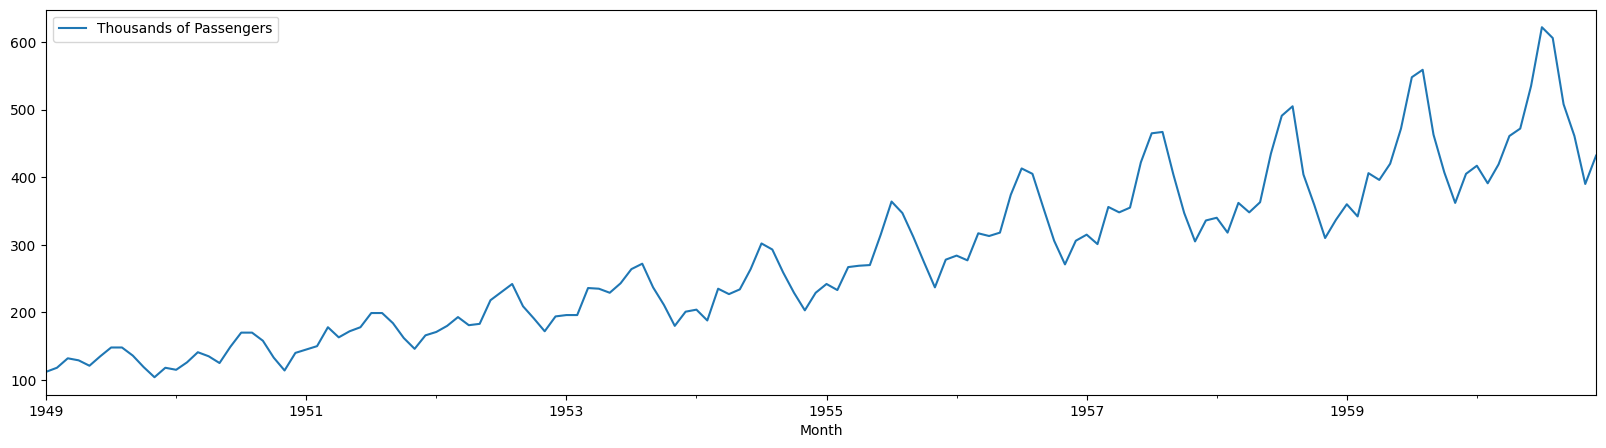

In [12]:
df_airline.plot(figsize=(20, 5))

In [13]:
# df_airline is a seasonal data as per the plot
# seasonal data cannot be a stationary data

from statsmodels.tsa.stattools import adfuller # type: ignore

In [14]:
def adf_test(series):
    result=adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('p- value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [15]:
adf_test(df_airline['Thousands of Passengers'])

ADF Statistics: 0.8153688792060498
p- value: 0.991880243437641
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
# inorder to make it stationary, we are doing differencing
# we are doing differencing by 1 day
df_airline['Passengers First Difference'] = df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(1)

In [17]:
df_airline.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [18]:
adf_test(df_airline['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700047
p- value: 0.05421329028382478
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
# use Techniques Differencing
df_airline['Passengers Second Difference']=df_airline['Passengers First Difference']-df_airline['Passengers First Difference'].shift(1)

In [20]:
adf_test(df_airline['Passengers Second Difference'].dropna())

ADF Statistics: -16.384231542468513
p- value: 2.7328918500142026e-29
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [23]:
# 12 months 
# use techniques fifferencing
# since its a seasonal data doing the differencing fot 12 months
df_airline['Passengers 12 Difference']=df_airline['Thousands of Passengers']-df_airline['Thousands of Passengers'].shift(12)
adf_test(df_airline['Passengers 12 Difference'].dropna())

ADF Statistics: -3.383020726492481
p- value: 0.011551493085514952
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [21]:
# now we will select our p & q values

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # type: ignore

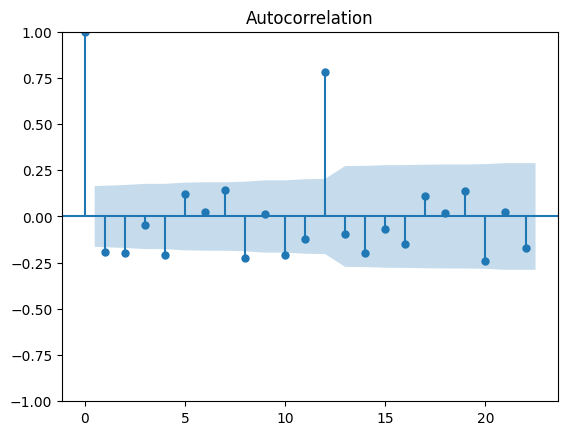

In [22]:
acf = plot_acf(df_airline["Passengers Second Difference"].dropna())

!['Passengers 2 Differencing'](../../outputs/acf_passengers_2_difference.png)

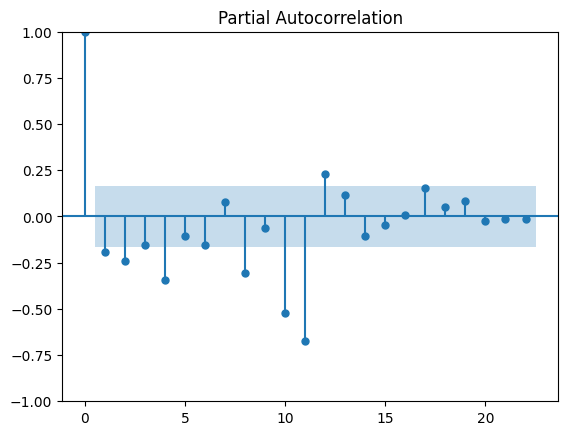

In [32]:
pacf = plot_pacf(df_airline["Passengers Second Difference"].dropna())

!['Passengers 2 Differencing'](../../outputs/pacf_passengers_2_difference.png)

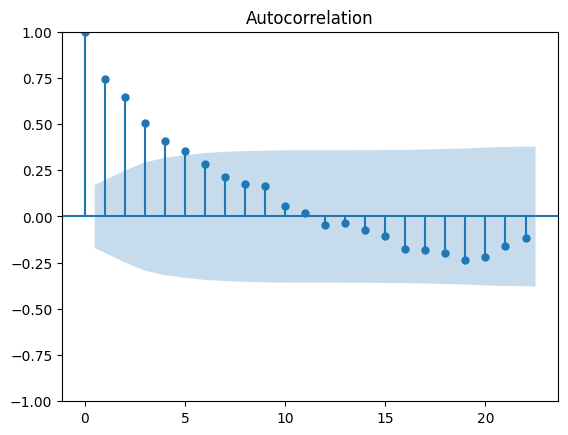

In [25]:
acf12 = plot_acf(df_airline["Passengers 12 Difference"].dropna())

- **1st 0 (zero) we don't count**

!['Passengers 12 Differencing'](../../outputs/acf_passengers_12_difference.png)

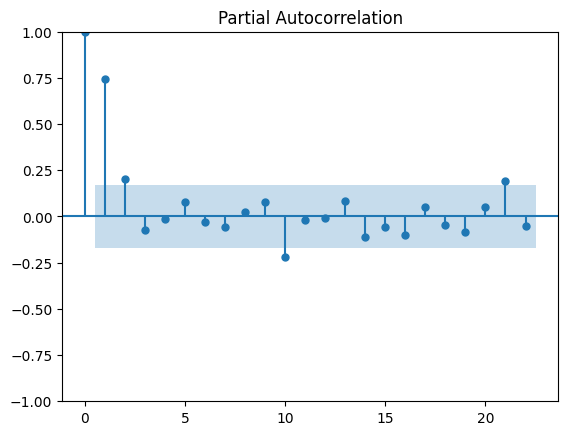

In [26]:
pacf12 = plot_pacf(df_airline["Passengers 12 Difference"].dropna())

!['Passengers 12 Differencing'](../../outputs/pacf_passengers_12_difference.png)

In [27]:
# spilt data
df_airline

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [28]:
from datetime import datetime,timedelta

train_dataset_end = datetime(1955,12,1)
test_dataset_end = datetime(1960,12,1)

In [29]:
train_data = df_airline[:train_dataset_end]
test_data = df_airline[train_dataset_end+timedelta(days=1):test_dataset_end]

In [30]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [36]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [37]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## Create ARIMA model

In [34]:
from statsmodels.tsa.arima.model import ARIMA # type: ignore

In [44]:
# p = 10
# d = 2 (differencing) (for stationary data)
# q = 12 (high impact) => this will be 0 - 12 th value means seasonal value we going to predict so its zero here
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10, 2, 0))

/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/mnt/d/vault/devhub/timeseries_cookbook/.venv/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [45]:
model_Arima_fit = model_ARIMA.fit()

In [46]:
model_Arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Tue, 30 Jul 2024   AIC                            736.477
Time:                             02:55:42   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# prediction
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [48]:
pred = model_Arima_fit.predict(start = pred_start_date, end = pred_end_date)
residuals = test_data['Thousands of Passengers']- pred

In [49]:
pred

1956-01-01    300.183612
1956-02-01    309.478355
1956-03-01    316.443015
1956-04-01    307.827544
1956-05-01    318.544234
1956-06-01    348.922083
1956-07-01    366.020287
1956-08-01    346.567534
1956-09-01    332.120969
1956-10-01    307.734755
1956-11-01    311.623912
1956-12-01    339.828197
1957-01-01    349.840405
1957-02-01    356.098234
1957-03-01    350.687829
1957-04-01    350.080465
1957-05-01    361.157694
1957-06-01    381.216517
1957-07-01    382.319374
1957-08-01    372.852581
1957-09-01    364.110098
1957-10-01    356.108926
1957-11-01    371.293791
1957-12-01    385.323597
1958-01-01    392.077839
1958-02-01    391.405852
1958-03-01    388.404583
1958-04-01    391.572859
1958-05-01    402.448082
1958-06-01    413.255686
1958-07-01    410.853417
1958-08-01    407.670546
1958-09-01    402.486338
1958-10-01    406.089150
1958-11-01    418.125316
1958-12-01    426.012377
1959-01-01    429.205584
1959-02-01    427.352235
1959-03-01    428.150992
1959-04-01    432.790851


In [50]:
residuals

Month
1956-01-01    -16.183612
1956-02-01    -32.478355
1956-03-01      0.556985
1956-04-01      5.172456
1956-05-01     -0.544234
1956-06-01     25.077917
1956-07-01     46.979713
1956-08-01     58.432466
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828197
1957-01-01    -34.840405
1957-02-01    -55.098234
1957-03-01      5.312171
1957-04-01     -2.080465
1957-05-01     -6.157694
1957-06-01     40.783483
1957-07-01     82.680626
1957-08-01     94.147419
1957-09-01     39.889902
1957-10-01     -9.108926
1957-11-01    -66.293791
1957-12-01    -49.323597
1958-01-01    -52.077839
1958-02-01    -73.405852
1958-03-01    -26.404583
1958-04-01    -43.572859
1958-05-01    -39.448082
1958-06-01     21.744314
1958-07-01     80.146583
1958-08-01     97.329454
1958-09-01      1.513662
1958-10-01    -47.089150
1958-11-01   -108.125316
1958-12-01    -89.012377
1959-01-01    -69.205584
1959-02-01    -85.352235
1959-03-01    -22.150992
1959-04-01    -36.7

<Axes: ylabel='Density'>

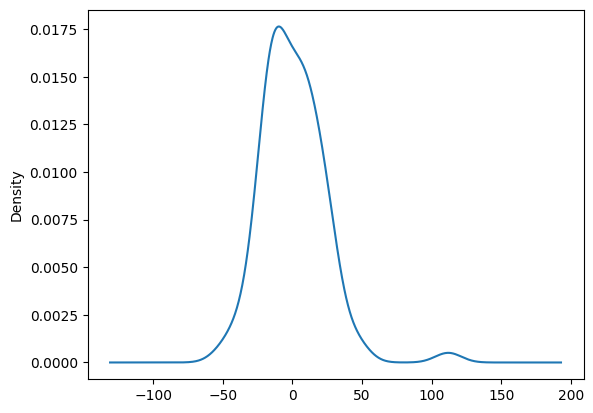

In [51]:
model_Arima_fit.resid.plot(kind = 'kde')

In [52]:
test_data['Predicted_ARIMA'] = pred

/tmp/ipykernel_809718/284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<Axes: xlabel='Month'>

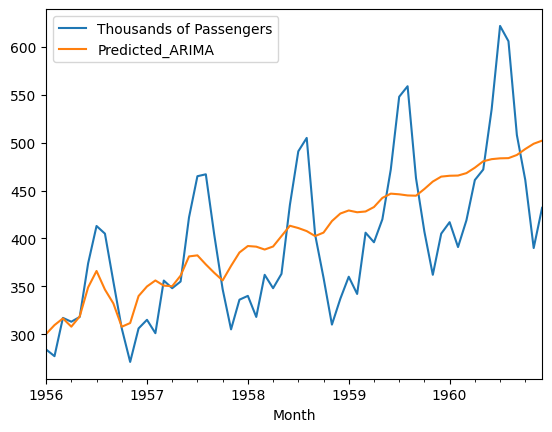

In [53]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot()

- **In this experiment ARIMA model didn't work well since the dataset is a seasonal data**
- Try ARIMA with stocks data, since its mostly not seasonal